<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Импорт библиотек

In [70]:
# Обработка данных
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, spearmanr

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
STATE = np.random.RandomState(12345)

### Знакомство с данными

In [5]:
data = pd.read_csv('/datasets/insurance.csv')

data.head(13)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [6]:
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_pay']

In [7]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   age             5000 non-null   float64
 2   salary          5000 non-null   float64
 3   family_members  5000 non-null   int64  
 4   insurance_pay   5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,gender,age,salary,family_members,insurance_pay
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
data.duplicated().sum()

153

In [9]:
data = data.drop_duplicates().reset_index(drop=True)

data.duplicated().sum()

0

Посмотрим на корреляцию с помощью тепловой карты.

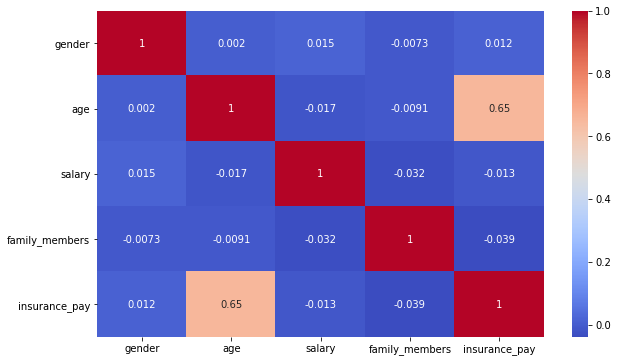

In [31]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm');

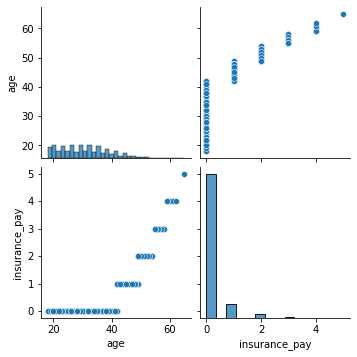

In [74]:
sns.pairplot(data[['age', 'insurance_pay']]);

Видим что у нас есть взаимосвязь с "Страховые выплаты" и "Возрастом". Посмотрим на корреляцию Спирмена 

In [72]:
r = spearmanr(data['age'], data['insurance_pay'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.5556554197171008 p-value: 0.0


Корреляция есть. Можем наблюдать,  что примерно до 40 лет страховыми выплатами не пользуются. Чем старше становиться клиент, чем чаще он пользуется страховыми выплатами. 

Изменим тип на **int** в `age`, `salary`.

In [12]:
data[['age', 'salary']] = data[['age', 'salary']].astype('int')

data.head()

,gender,age,salary,family_members,insurance_pay
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


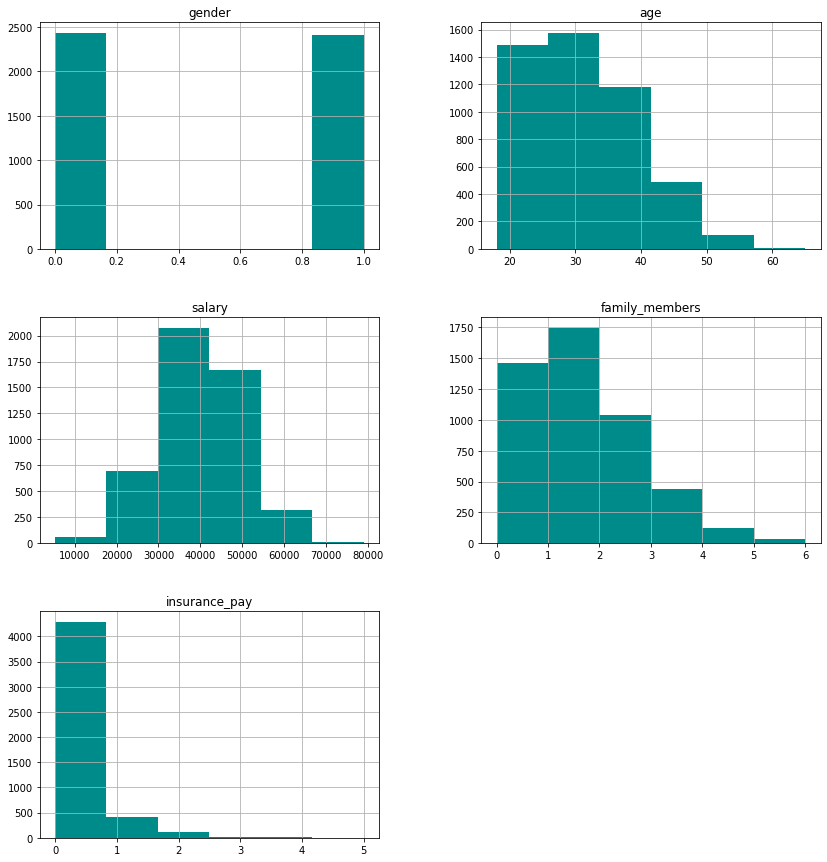

In [83]:
data.hist(bins=6, figsize=(14,15), fc='darkcyan');

In [64]:
def plot_barh(index, values):
    data.pivot_table(index = index, values = values, aggfunc='sum').sort_values(index)\
    .plot.bar(figsize=(9,6),  fc='darkcyan');   

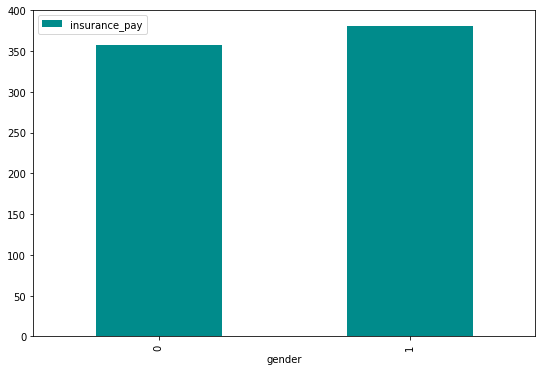

In [66]:
plot_barh('gender', 'insurance_pay')

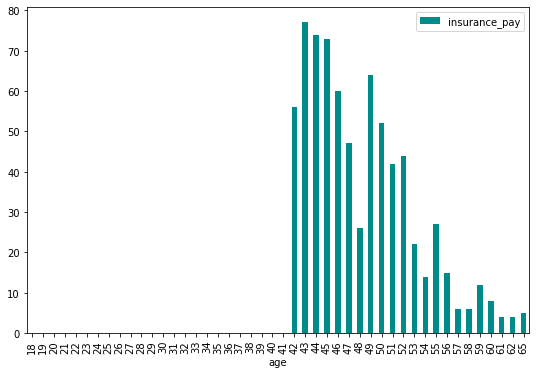

In [67]:
plot_barh('age', 'insurance_pay')

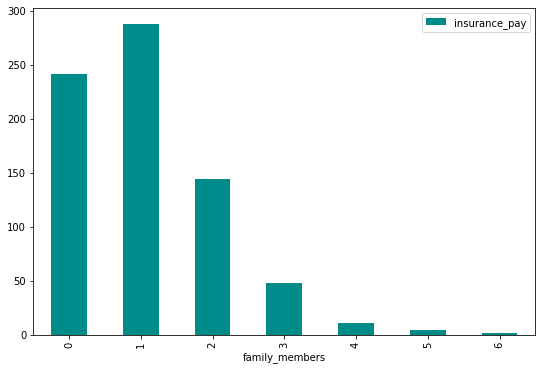

In [68]:
plot_barh('family_members', 'insurance_pay')

**Вывод:** Привели название столбцов в соответствующий вид. Изменили тип данных в столбцах `age`, `salary`. Удалили дубликаты в размере 153.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Качество не измениться, score модели останется прежним.

**Обоснование:** 
$$
w = (X^T X)^{-1} X^T y
$$

Представим матрицу как умножения первоначальной матрицы **X** на обратимую **P**:
$$
X = XP
$$

Получим следущую формулу:
$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Применим правило транспонирования:
$$
w1 = (P^TX^T XP)^{-1} P^TX^T y
$$

Вынесем за скобки $P^T$:
$$
w1 = (X^T XP)^{-1}(P^T)^{-1}P^T X^T y
$$

Перемножением $(P^T)^{-1}$ на $P^T$ будет **E**:
$$
w1 = (X^T XP)^{-1} X^T y
$$

Вынесем за скобки **P**:
$$
w1 = P^{-1}(X^T X)^{-1} X^T y
$$

Получим: 
$$
w1 = P^{-1} w
$$

Подставим в формулу для предсказания **a1**:
$$
a1 = XPP^{-1} w = X w = a
$$

Исходя из полученной формулы, мы выявили, что, перемножив матрицу признаков на обратную матрицу, наши предсказания $a$ и $a1$ будут равны. Т.к. признаки исходной матрицы и зашифрованной выражаются через вектор весов $w$

## Алгоритм преобразования

**Алгоритм**

Алгоритмом нашего преобразования послужит перемножения наших признаков на рандомную созданную обратную матрицу. Размер матрицы будет (4х4) по количеству признаков. Создав матрицу, мы проверим ее на обратимость. Перемножив, должны получить единичную матрицу. После проведем шифровку данных. И проверим score на до шифрования и после. 

**Обоснование**

Обоснованием послужит, что качество нашей модели, которую мы будем проверять с помощью метрики **r2** как для исходных данных, так и для зашифрованных, не измениться. После сможем вернуть данные в исходный вид.

## Проверка алгоритма

Разделим данные на признаки и целевые признаки

In [18]:
features = data.drop('insurance_pay', axis=1)
target = data['insurance_pay']

Создадим класс с нашей моделью Линейной регрессии.

In [19]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создадим рандомную матрицу

In [20]:
rnd_features = np.random.randint(100, size=(features.shape[1], features.shape[1]))
rnd_features

array([[47, 75, 11, 58],
       [73, 21, 34, 79],
       [86, 33, 94, 86],
       [69, 11, 43,  8]])

Найдем обратную матрицу

In [21]:
back_rnd_features = np.linalg.inv(rnd_features)
back_rnd_features

array([[-0.00051679,  0.0119531 , -0.01225731,  0.01747597],
       [ 0.01607019, -0.01516419,  0.00296104,  0.00140634],
       [-0.00279999, -0.01777461,  0.01842581, -0.00225324],
       [-0.00258922,  0.01329377,  0.00260917, -0.01555277]])

Проверим перемножив матрицы. Должны получить ед. матрицу

In [22]:
abs(np.around(back_rnd_features @ rnd_features))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Делаем шифровку данных. Умножив наши признаки на обратную матрицу.

In [23]:
new_features = features @ back_rnd_features
new_features

,0,1,2,3
0,-138.223712,-882.217060,914.031760,-111.701036
1,-105.662965,-676.119377,700.319466,-85.573916
2,-58.333746,-373.706537,387.027808,-47.277220
3,-116.427271,-741.493030,768.423534,-93.961609
4,-72.630280,-464.329923,480.984203,-58.752666
...,...,...,...,...
4842,-99.514842,-634.951529,657.889422,-80.432335
4843,-146.175658,-931.891767,965.615548,-118.037424
4844,-94.603422,-602.835920,624.699282,-76.387757
4845,-91.214400,-581.511472,602.584588,-73.679135


Обучаем модели и проверяем качество.

In [24]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010046633359


In [25]:
new_model = LinearRegression()
new_model.fit(new_features, target)
new_predictions = new_model.predict(new_features)
print(r2_score(target, new_predictions))

0.43020100466331823


Делаем дешифровку.

In [26]:
display(features)
np.abs(np.around(new_features @ rnd_features))

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4842,0,28,35700,2
4843,0,34,52400,1
4844,0,20,33900,2
4845,1,22,32700,3


,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4842,0.0,28.0,35700.0,2.0
4843,0.0,34.0,52400.0,1.0
4844,0.0,20.0,33900.0,2.0
4845,1.0,22.0,32700.0,3.0


**Вывод:** Задачей данного проекта необходимо было защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

* 1 Этапом мы ознакомились с данными. Данные состоят из 5 тыс. строк и 5 признаков, 1 из которых в дальнейшем будет целевой, а именно "Страховые выплаты". Так же было 153 дубликата которые мы удалили. Еще мы посмотрели на корреляцию данных, больше взаимосвязь показали "Возраст" и "Страховые выплаты"

* 2 Этапом нам необходимо было выявить, изменится ли качество линейной регрессии. Если признаки умножают на обратимую матрицу. Мы обосновали с помощью формул.[Умножение матриц](#Умножение-матриц)

* 3 и 4 Этапом мы продумали и воспользовались алгоритмом преобразования. Нам удалось зашифровать данные с помощью умножения наших признаков на обратную матрицу. При использование модели Линейной регрессии качество метрики **r2** до и после шифрования составило **0.43**. Так же алгоритм позволяет вернуть нам исходные признаки. При этом алгоритм каждый раз меняет данные, что делает практически невозможным процесс дешифрования. 

**Итог:** Данный алгоритм подходить для нашей задачи.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования